In [ ]:
import pandas as pd

In [ ]:
url = '/content/drive/MyDrive/tableau de bord des engins les mois 7 et 8.xlsx'

In [ ]:
df = pd.concat(pd.read_excel(url, sheet_name=None), ignore_index=True)

In [ ]:
df.rename(columns = {'Engin ou Equipement':'machine', 'Durée d\'arrêt':'downtime'}, inplace = True)

In [ ]:
df = df[df['machine'].notna() & df['downtime'].notna()]

In [ ]:
len(df)

2884

In [ ]:
len(df['machine'].value_counts())

30

In [ ]:
df['machine'].value_counts()

J5     287
J11    201
J10    192
S12    187
J8     181
J7     153
J12    148
J9     131
J6     128
T10    123
T9     120
S11    102
T11    100
T12     93
J4      89
S10     84
T3      84
T1      79
T7      63
S7      59
T2      58
S13     57
S9      44
S8      41
D       34
S3      21
PF2     14
T4       6
T8       3
S4       2
Name: machine, dtype: int64

In [ ]:
J5 = df[df['machine'] == 'J5']['downtime']

In [ ]:
J5.head().values

array([45., 45., 45., 45., 10.])

In [ ]:
J5.describe()

count    287.000000
mean      36.289199
std       49.134929
min       10.000000
25%       10.000000
50%       20.000000
75%       45.000000
max      480.000000
Name: downtime, dtype: float64

In [ ]:
J5.round(0).value_counts(ascending=True)

480.0      1
30.0       1
180.0      1
75.0       1
300.0      2
240.0      3
90.0       5
120.0     10
60.0      29
20.0      36
45.0      64
10.0     134
Name: downtime, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

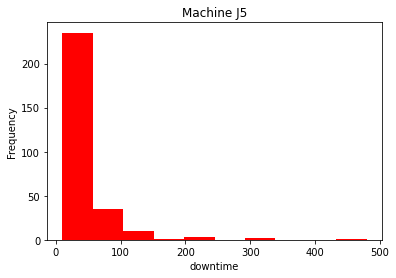

In [ ]:
plt.hist(J5,color = 'red')
#titre
plt.title("Machine J5")
#x
plt.xlabel("downtime")
#y
plt.ylabel("Frequency")

plt.show()

  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51 / 104: 

Text(0, 0.5, 'Frequency')

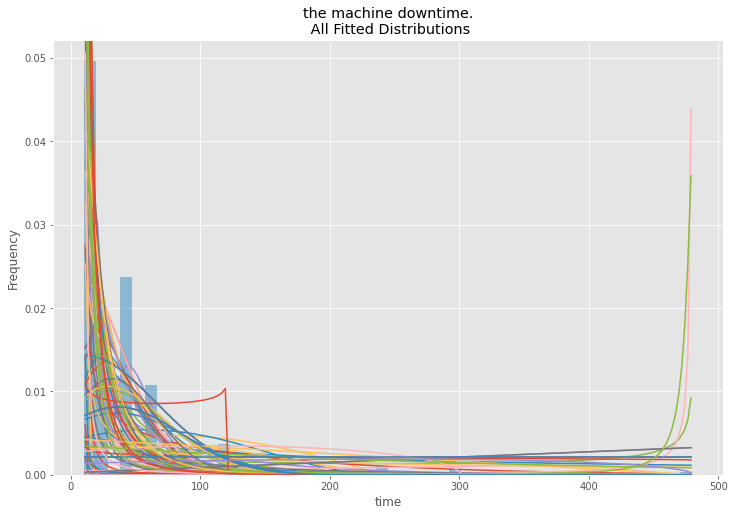

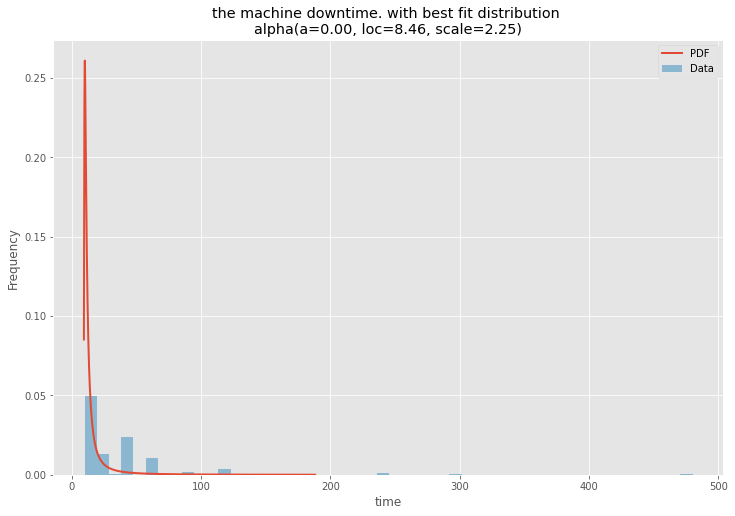

In [132]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = J5

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'the machine downtime.\n All Fitted Distributions')
ax.set_xlabel(u'time')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'the machine downtime. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'time')
ax.set_ylabel('Frequency')

In [138]:
from scipy.stats import alpha

In [156]:
alpha.pdf(10, 0.00000001, 8.46, 2.25)

0.2603460983950787